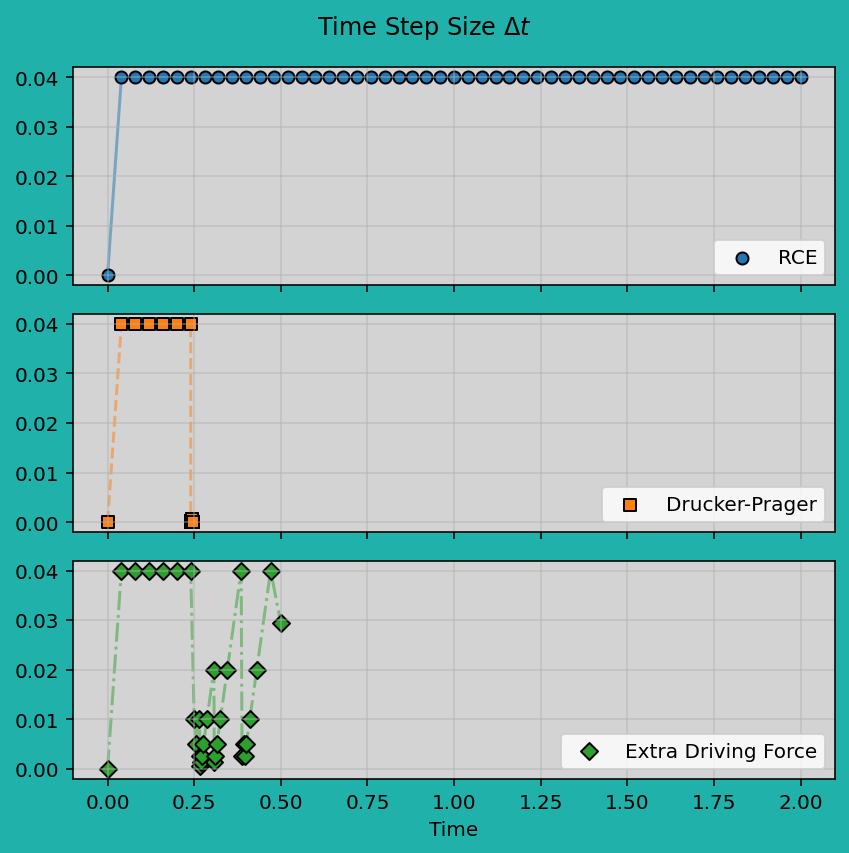

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import matplotlib

def plot_csv_files(cl, xy, xy_label,labels, bg_color="white",f_color='lightseagreen',s=1):
    # 產生不重複的 marker 與 line style
    markers = itertools.cycle(['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'H', '+', 'x'])
    linestyles = itertools.cycle(['-', '--', '-.', ':'])

    plt.figure(figsize=(10, 3),dpi=144,facecolor=f_color)
    ax = plt.gca()
    ax.set_facecolor(bg_color)

    for csv_file, label in zip(cl, labels):
        df = pd.read_csv(csv_file)
        x = df[xy[0]]
        y = df[xy[1]]

        marker = next(markers)
        linestyle = next(linestyles)

        # 繪製線條
        plt.plot(x, s*y, linestyle=linestyle,alpha = 0.5)
        plt.scatter (x,s*y, marker=marker, label=label,edgecolor= 'k')
        


    plt.xlabel(xy_label[0])
    plt.ylabel(xy_label[1])
    #plt.title("Scatter + Line Plot")
    plt.legend()
    plt.grid(True,alpha=0.5)
    plt.tight_layout()
    plt.show()



def plot_csv_files_subplots(cl, xy, xy_label, labels, bg_color="white", f_color='lightseagreen', s=1):
    # 定義 cycle
    markers = itertools.cycle(['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'H', '+', 'x'])
    linestyles = itertools.cycle(['-', '--', '-.', ':'])
    colors = itertools.cycle(plt.cm.tab10.colors)  # 使用 tab10 調色盤循環顏色

    n = len(cl)
    fig, axes = plt.subplots(n, 1, figsize=(6, 2*n), dpi=144, facecolor=f_color,sharex = True)

    if n == 1:
        axes = [axes]

    for i,(ax, csv_file, label) in enumerate(zip(axes, cl, labels)):
        # 每個檔案都取下一個樣式
        marker = next(markers)
        linestyle = next(linestyles)
        color = next(colors)

        df = pd.read_csv(csv_file)
        x = df[xy[0]]
        y = df[xy[1]]

        ax.set_facecolor(bg_color)
        ax.plot(x, s*y, linestyle=linestyle, color=color, alpha=0.5,zorder=-1)
        ax.scatter(x, s*y, marker=marker, color=color, label=label, edgecolor='k')

        if i == n-1:
            ax.set_xlabel(xy_label[0])
        #ax.set_ylabel(xy_label[1])
        ax.legend(loc="lower right")
        ax.grid(True, alpha=0.5,zorder=-1)
    fig.suptitle(xy_label[1])
    plt.tight_layout()
    plt.show()


# 使用範例
cl = ["rce.csv", "dp.csv", "Ce.csv"]
xy = ["time", "dt"]
xy_label = ['Time',r'Time Step Size $\Delta t$']
labels = ["RCE", "Drucker-Prager", "Extra Driving Force"]

plot_csv_files_subplots(cl, xy,xy_label, labels, bg_color="lightgray")



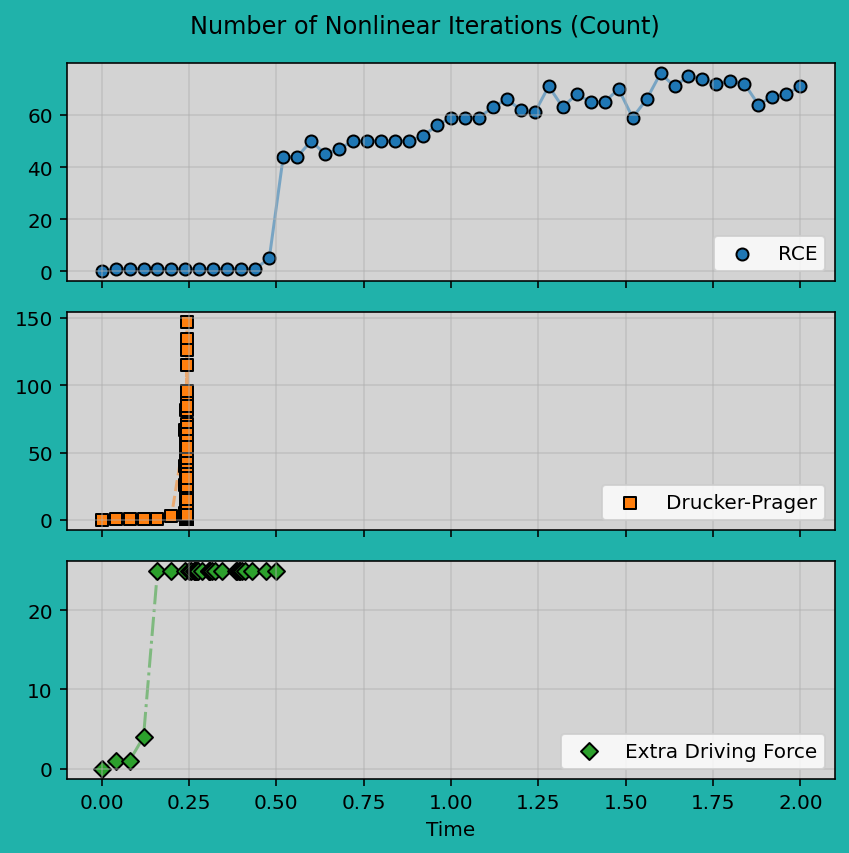

In [2]:
xy = ["time", "z_n_nl_its"]
xy_label = ['Time',"Number of Nonlinear Iterations (Count)"]
labels = ["RCE", "Drucker-Prager", "Extra Driving Force"]
plot_csv_files_subplots(cl, xy,xy_label, labels, bg_color="lightgray")


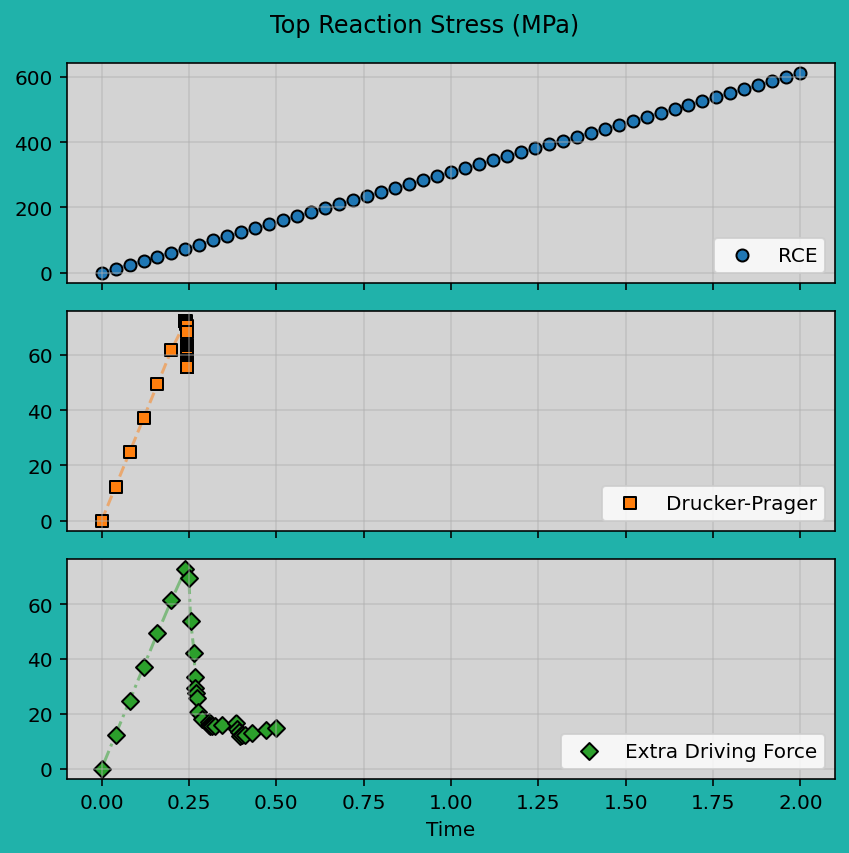

In [3]:
xy = ["time", "top_stress_yy"]
cl = ["rce.csv", "dp.csv", "Ce.csv"]
xy_label = ['Time',"Top Reaction Stress (MPa)"]
labels = ["RCE", "Drucker-Prager", "Extra Driving Force"]
plot_csv_files_subplots(cl, xy,xy_label, labels, bg_color="lightgray",s=-1)